## **Load Data**:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [40]:
df=pd.read_csv("clinical_trial_with_target.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   nct_id             130000 non-null  object 
 1   phase              129555 non-null  object 
 2   condition          130000 non-null  object 
 3   intervention_type  129877 non-null  object 
 4   study_design       129037 non-null  object 
 5   sponsor_type       130000 non-null  object 
 6   enrollment         126269 non-null  float64
 7   status             130000 non-null  object 
 8   gender             130000 non-null  object 
 9   min_age            129704 non-null  object 
 10  max_age            100348 non-null  object 
 11  location           122897 non-null  object 
 12  start_date         129349 non-null  object 
 13  completion_date    129104 non-null  object 
 14  results            130000 non-null  object 
 15  p_value            118732 non-null  float64
 16  fi

In [42]:
df=df[df['p_value'].notna()]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118732 entries, 0 to 129999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   nct_id             118732 non-null  object 
 1   phase              118732 non-null  object 
 2   condition          118732 non-null  object 
 3   intervention_type  118732 non-null  object 
 4   study_design       118716 non-null  object 
 5   sponsor_type       118732 non-null  object 
 6   enrollment         118732 non-null  float64
 7   status             118732 non-null  object 
 8   gender             118732 non-null  object 
 9   min_age            118732 non-null  object 
 10  max_age            95719 non-null   object 
 11  location           118732 non-null  object 
 12  start_date         118732 non-null  object 
 13  completion_date    118732 non-null  object 
 14  results            118732 non-null  object 
 15  p_value            118732 non-null  float64
 16  final_s

In [44]:
conditions_to_replace = [
    'fibrosis', 'Fibrosis', 'HIV infection', 'HIV Infections', 'Kidney Failure', 'Dibetes Mellitus',
    'Nephrotic Syndrome', 'Proteinuria', 'Obesity', 'Schizophrenia', 'Childhood Schizophrenia',
    'Sleep Apnea Syndrome', 'Focal Glomerulosclerosis', 'Metabolic Disease',
    'Cognition Disorders', 'Depression', 'Psychotic Disorder', 'Melancholia'
]
df['condition'] = df['condition'].replace(conditions_to_replace, 'others')

## **EDA**:

In [45]:
df['completion_date'] = pd.to_datetime(df['completion_date'])
df['start_date'] = pd.to_datetime(df['start_date'])
df['duration'] = (df['completion_date'] - df['start_date']).dt.days
df.drop(['completion_date', 'start_date'], axis=1, inplace=True)

df['duration'].describe()

count    118732.000000
mean       5562.816705
std        1491.153510
min        1795.000000
25%        4841.000000
50%        4841.000000
75%        4841.000000
max        8596.000000
Name: duration, dtype: float64

/tmp/ipykernel_25872/1043625701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='final_status', data=df, palette='viridis')


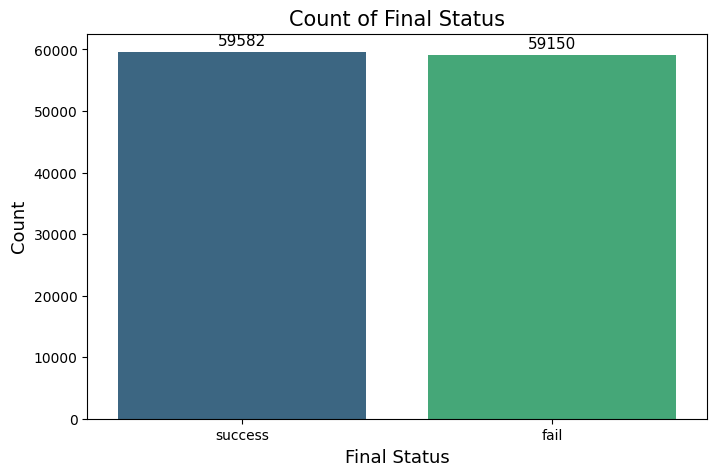

'Total successful and failed trials'

In [46]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='final_status', data=df, palette='viridis')
plt.title('Count of Final Status', fontsize=15)
plt.xlabel('Final Status', fontsize=13)
plt.ylabel('Count', fontsize=13)

# Annotate values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=11)

plt.show()

'''Total successful and failed trials'''

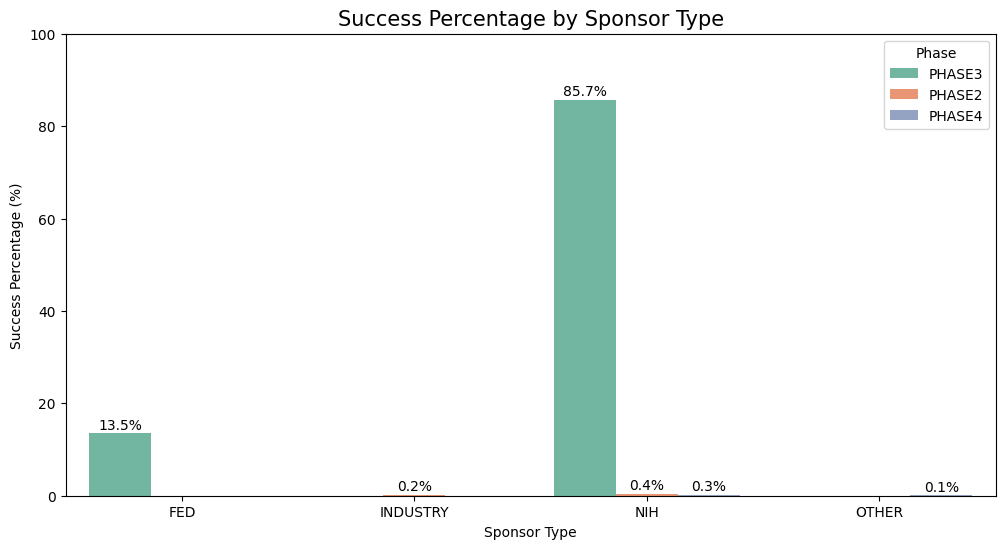

Number of successful trials for each sponsor:


sponsor_type
NIH         51422
FED          8025
INDUSTRY       98
OTHER          37
Name: count, dtype: int64

In [47]:
# Calculate percentage of successful trials for each sponsor_type and phase relative to total successful trials
success_df= df[df['final_status']=='success']
total_success = success_df.shape[0]
success_pct = (
    success_df.groupby(['sponsor_type', 'phase'])
    .size()
    .reset_index(name='count')
)
success_pct['success_percentage'] = (success_pct['count'] / total_success) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=success_pct,
    x='sponsor_type',
    y='success_percentage',
    hue='phase',
    palette='Set2'
)
plt.title('Success Percentage by Sponsor Type', fontsize=15)
plt.xlabel('Sponsor Type')
plt.ylabel('Success Percentage (%)')
plt.ylim(0, 100)
plt.legend(title='Phase')

ax.tick_params(colors='black')
for spine in ax.spines.values():
    spine.set_color('black')

# Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=10, color='black')

plt.show()

print('Number of successful trials for each sponsor:')

success_df['sponsor_type'].value_counts()

/tmp/ipykernel_25872/1786715144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=success_phase_percentage.index, y=success_phase_percentage.values, palette='viridis')


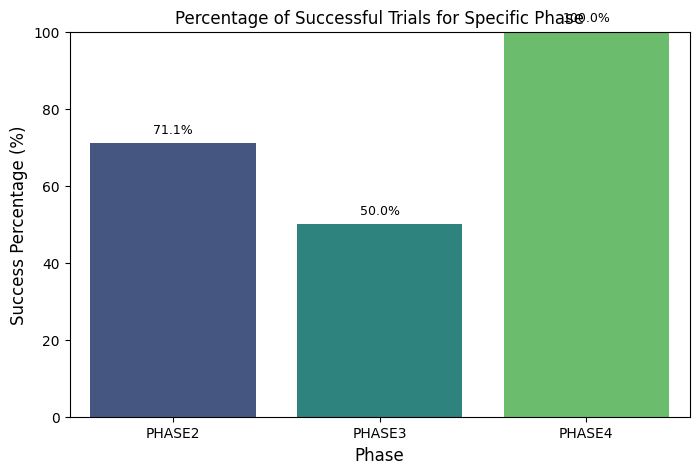

Number of successful trials for each phase:


phase
PHASE3    59071
PHASE2      325
PHASE4      186
Name: count, dtype: int64

In [48]:
phase_percentage = df.groupby('phase')['final_status'].value_counts(normalize=True).unstack() * 100
success_phase_percentage = phase_percentage['success'].dropna()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=success_phase_percentage.index, y=success_phase_percentage.values, palette='viridis')
plt.title('Percentage of Successful Trials for Specific Phase', fontsize=12)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Success Percentage (%)', fontsize=12)
plt.ylim(0, 100)

# Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, xytext=(0, 5), textcoords='offset points')

plt.show()
print('Number of successful trials for each phase:')
success_df['phase'].value_counts()

In [49]:
df['phase'].value_counts()

phase
PHASE3    118089
PHASE2       457
PHASE4       186
Name: count, dtype: int64

/tmp/ipykernel_25872/4088039542.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette='viridis')


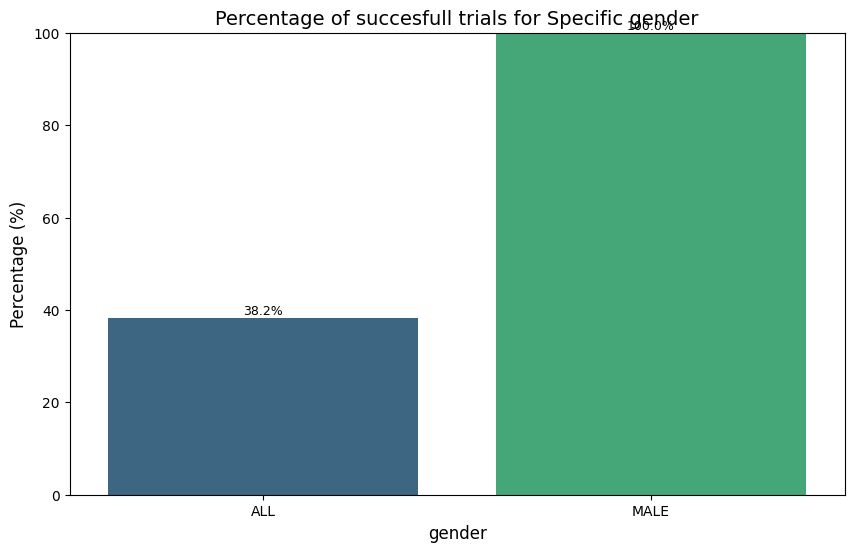

Number of Successful trials on females = 0 
Number of successful tirals for each gender:


gender
ALL     36585
MALE    22997
Name: count, dtype: int64

In [50]:
gender_percentage = df.groupby('gender')['final_status'].value_counts(normalize=True).unstack() * 100
gender_percentage = gender_percentage['success']  # Select the percentage for output_label == 1

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette='viridis')
plt.title('Percentage of succesfull trials for Specific gender', fontsize=14)
plt.xlabel('gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

plt.show()
print("Number of Successful trials on females = 0 \nNumber of successful tirals for each gender:" )
success_df['gender'].value_counts()

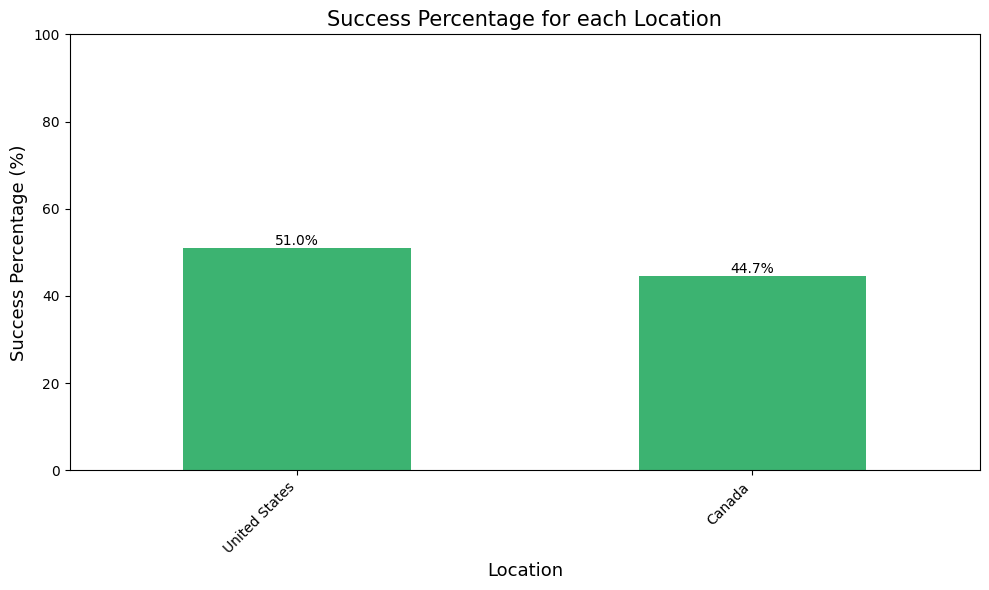

Total number of trials conducted in each location:


location
United States    103503
Canada            15229
Name: count, dtype: int64

In [51]:
# Calculate percentage of successful trials for each location
location_total = df['location'].value_counts()
location_success_count = success_df['location'].value_counts()
location_success_pct = (location_success_count / location_total) * 100

# Plot the percentage of successful trials for each location
plt.figure(figsize=(10, 6))
ax = location_success_pct.plot(kind='bar', color='mediumseagreen')
plt.title('Success Percentage for each Location', fontsize=15)
plt.xlabel('Location', fontsize=13)
plt.ylabel('Success Percentage (%)', fontsize=13)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

# Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("Total number of trials conducted in each location:")
df['location'].value_counts()


In [52]:
df['study_design'].value_counts()

study_design
RANDOMIZED    118716
Name: count, dtype: int64

In [53]:
df['intervention_type'].value_counts()

intervention_type
DRUG    118732
Name: count, dtype: int64

In [54]:
df['status'].value_counts()

status
COMPLETED    118732
Name: count, dtype: int64

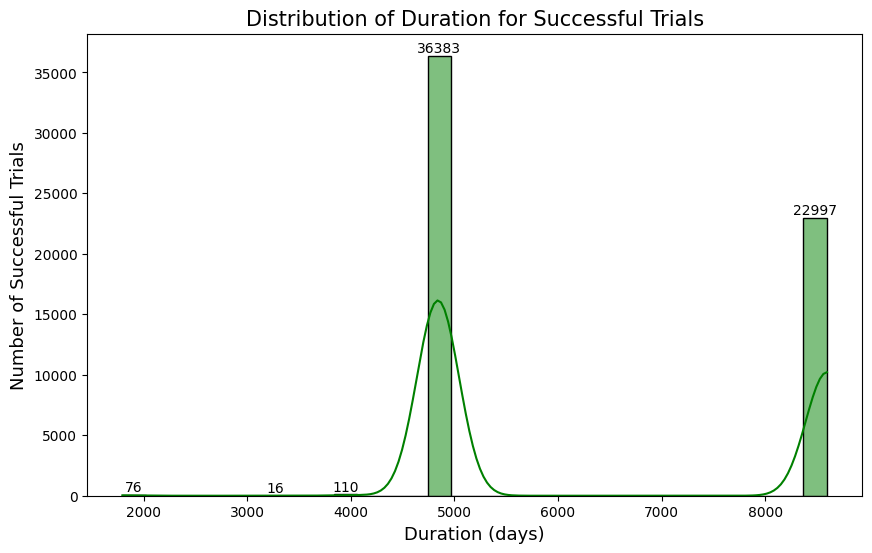

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(success_df['duration'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Duration for Successful Trials', fontsize=15)
plt.xlabel('Duration (days)', fontsize=13)
plt.ylabel('Number of Successful Trials', fontsize=13)

# Annotate values on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

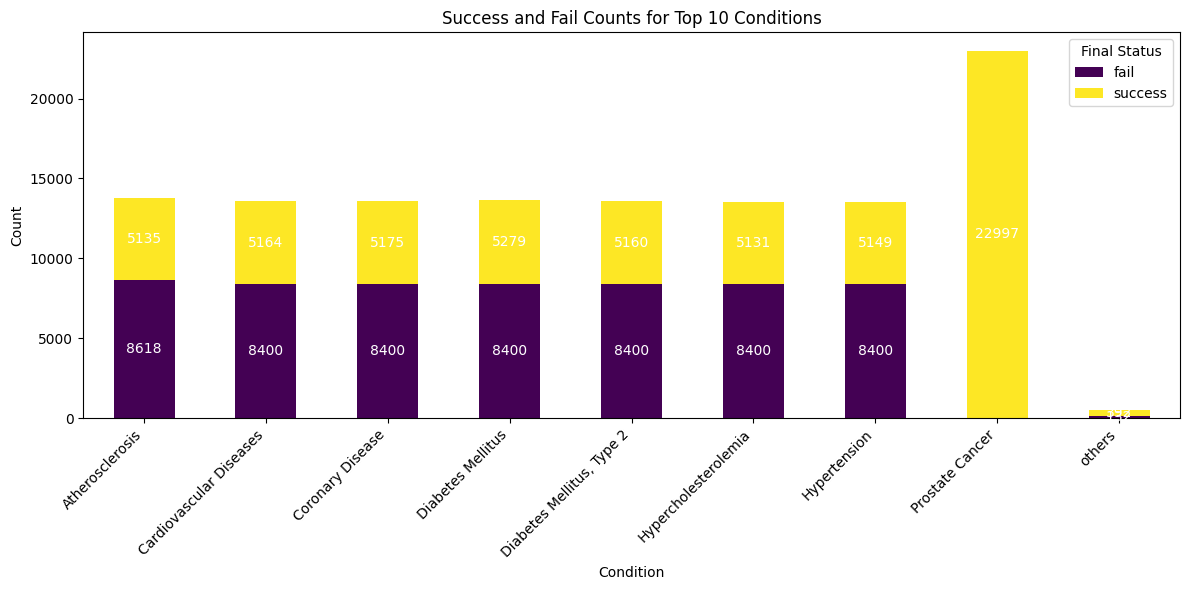

In [56]:
# Get top 10 most frequent conditions
top_conditions = df['condition'].value_counts().nlargest(10).index

# Filter dataframe for top conditions
df_top_conditions = df[df['condition'].isin(top_conditions)]

# Create a crosstab for condition vs final_status
condition_status_counts = pd.crosstab(df_top_conditions['condition'], df_top_conditions['final_status'])

# Plot stacked bar chart
ax = condition_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Success and Fail Counts for Top 10 Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Final Status')
plt.tight_layout()

# Annotate values on each bar segment
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='white')

plt.show()

In [57]:
df['condition'].value_counts()

condition
Prostate Cancer              22997
Atherosclerosis              13753
Diabetes Mellitus            13679
Coronary Disease             13575
Cardiovascular Diseases      13564
Diabetes Mellitus, Type 2    13560
Hypertension                 13549
Hypercholesterolemia         13531
others                         524
Name: count, dtype: int64

/tmp/ipykernel_25872/2884174289.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='phase', y='duration', data=df, estimator=np.mean, ci=None, palette='viridis')
/tmp/ipykernel_25872/2884174289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='phase', y='duration', data=df, estimator=np.mean, ci=None, palette='viridis')


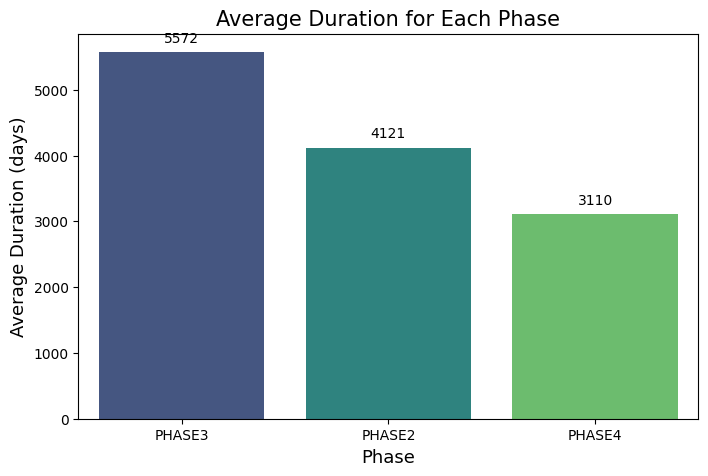

In [58]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='phase', y='duration', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Duration for Each Phase', fontsize=15)
plt.xlabel('Phase', fontsize=13)
plt.ylabel('Average Duration (days)', fontsize=13)

# Annotate bars with average duration values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.show()

In [59]:
success_df['gender'].value_counts()

gender
ALL     36585
MALE    22997
Name: count, dtype: int64

In [60]:
df.drop(['nct_id', 'intervention_type', 'study_design', 'status', 'results', 'p_value', 'min_age', 'max_age'], axis=1, inplace=True)

In [61]:
len(df['sponsor_type'].value_counts())

4

In [62]:
'''

phase- label
condition- ohe-hot
sponsor_type- one-hot
enrollment- normalize
gender- onehot
duration- normalize

'''

'\n\nphase- label\ncondition- ohe-hot\nsponsor_type- one-hot\nenrollment- normalize\ngender- onehot\nduration- normalize\n\n'

In [63]:
# Label encoding Phase Column
label_encoder = LabelEncoder()
label_encoder.fit(df['phase'])
df['phase_encoded'] = label_encoder.transform(df['phase'])
print(df[['phase', 'phase_encoded']])
df=df.drop(['phase'], axis=1) # Dropping the original phase column after encoding

         phase  phase_encoded
0       PHASE3              1
2       PHASE3              1
3       PHASE3              1
4       PHASE3              1
5       PHASE3              1
...        ...            ...
129995  PHASE3              1
129996  PHASE3              1
129997  PHASE3              1
129998  PHASE3              1
129999  PHASE3              1

[118732 rows x 2 columns]


In [64]:
# Print the mapping of classes to encoded values in label_encoder
for idx, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label} -> {idx}")

PHASE2 -> 0
PHASE3 -> 1
PHASE4 -> 2


In [65]:
# One-hot encoding categorical variables
df=pd.get_dummies(df, drop_first= True, dtype=int,
                  columns=['sponsor_type', 'gender', 'condition', 'final_status', 'location'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118732 entries, 0 to 129999
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   enrollment                           118732 non-null  float64
 1   duration                             118732 non-null  int64  
 2   phase_encoded                        118732 non-null  int64  
 3   sponsor_type_INDUSTRY                118732 non-null  int64  
 4   sponsor_type_NIH                     118732 non-null  int64  
 5   sponsor_type_OTHER                   118732 non-null  int64  
 6   gender_MALE                          118732 non-null  int64  
 7   condition_Cardiovascular Diseases    118732 non-null  int64  
 8   condition_Coronary Disease           118732 non-null  int64  
 9   condition_Diabetes Mellitus          118732 non-null  int64  
 10  condition_Diabetes Mellitus, Type 2  118732 non-null  int64  
 11  condition_Hypercho

In [66]:
df['duration'].describe()

count    118732.000000
mean       5562.816705
std        1491.153510
min        1795.000000
25%        4841.000000
50%        4841.000000
75%        4841.000000
max        8596.000000
Name: duration, dtype: float64

In [67]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['enrollment', 'duration']] = scaler.fit_transform(df[['enrollment', 'duration']])

In [68]:
df['duration'].describe()

count    118732.000000
mean        721.816705
std        1491.153510
min       -3046.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3755.000000
Name: duration, dtype: float64

In [69]:
df.to_csv("ProcessedData.csv")